---
```
SCSB4243 Special Topic on Bioinformatics 20212022/2
Alternative Assessment
Ji Tong Lin
A18CS0338
```
---

# Setting up the environment

In [21]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data

In [23]:
location = "https://raw.githubusercontent.com/TongLin1998/utm-scsb4243-aa/master/dataset/"

In [24]:
# location = "/content/gdrive/My Drive/STAA/"

In [25]:
df = pd.read_csv(f"{location}ObesityDataSet_raw_and_data_sinthetic.csv")

# Checking Data

In [26]:
df.shape

(2111, 17)

In [27]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Separating Numerical, Categorical & Target Feature

In [28]:
df_numerical = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
df_numerical.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [29]:
df_numerical.dtypes

Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

In [30]:
df_numerical.shape

(2111, 8)

In [31]:
df_categorical = df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']]
df_categorical.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [32]:
df_categorical.dtypes

Gender                            object
family_history_with_overweight    object
FAVC                              object
CAEC                              object
SMOKE                             object
SCC                               object
CALC                              object
MTRANS                            object
dtype: object

In [33]:
df_categorical.shape

(2111, 8)

In [34]:
df_target = pd.DataFrame(df['NObeyesdad'])
df_target.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [35]:
df_target.dtypes

NObeyesdad    object
dtype: object

In [36]:
df_target.shape

(2111, 1)

# Data Pre-processing

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Encoding categorical features

In [38]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [39]:
one_hot_encoder.fit(df_categorical)

OneHotEncoder(sparse=False)

In [40]:
one_hot_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object),
 array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
        'Walking'], dtype=object)]

In [41]:
df_categorical_transformed = pd.DataFrame(one_hot_encoder.transform(df_categorical))

In [42]:
df_categorical_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df_categorical_transformed.shape

(2111, 23)

## Encoding target feature

In [44]:
label_encoder = LabelEncoder()

In [45]:
label_encoder.fit(df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [46]:
label_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [47]:
y = label_encoder.transform(df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y

array([1, 1, 1, ..., 4, 4, 4])

## Normalizing numerical features

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

In [52]:
df_numerical_normalized.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0


## Concatenate final data

In [53]:
X = pd.concat([df_numerical_normalized, df_categorical_transformed], axis=1)

In [54]:
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,0,1,...,13,14,15,16,17,18,19,20,21,22
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Splitting

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df_target, random_state=42)

In [57]:
X_train.shape

(1477, 31)

In [58]:
X_test.shape

(634, 31)

In [59]:
from collections import Counter

In [60]:
len(y_train)

1477

In [61]:
Counter(y_train)

Counter({0: 190, 1: 201, 2: 245, 3: 208, 4: 227, 5: 203, 6: 203})

In [62]:
len(y_test)

634

In [63]:
Counter(y_test)

Counter({0: 82, 1: 86, 2: 106, 3: 89, 4: 97, 5: 87, 6: 87})

# Classification

In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [65]:
class_labels = {
    '0': 'Insufficient_Weight',
    '1': 'Normal_Weight',
    '2': 'Obesity_Type_I',
    '3': 'Obesity_Type_II',
    '4': 'Obesity_Type_III',
    '5': 'Overweight_Level_I',
    '6': 'Overweight_Level_II'
}

## Baseline Performance

In [66]:
from sklearn.dummy import DummyClassifier

In [67]:
zeroR = DummyClassifier(strategy="most_frequent")

In [68]:
zeroR.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [69]:
baseline_accuracy = zeroR.score(X_test, y_test)
baseline_accuracy

0.167192429022082

## Decision Tree (DT)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier(random_state=42)

In [72]:
dt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_dt = dt.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


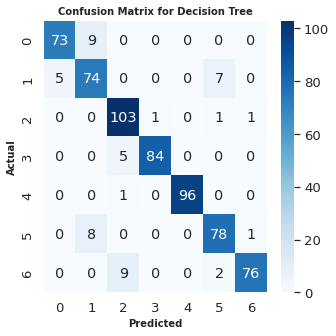


Accuracy: 0.9211
Precision: 0.9244
Recall: 0.9211
F1 score: 0.9217


In [74]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize = (5,5))
sns.set(font_scale=1.2)

img = sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt='g')

img.set_title(f"Confusion Matrix for Decision Tree", fontsize=10, fontweight='bold')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('Actual', fontsize=10, fontweight='bold')
plt.show()

print()
print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred_dt), 4)))
print("Precision: " + str(round(metrics.precision_score(y_test, y_pred_dt, average='weighted'), 4)))
print("Recall: " + str(round(metrics.recall_score(y_test, y_pred_dt, average='weighted'), 4)))
print("F1 score: " + str(round(metrics.f1_score(y_test, y_pred_dt, average='weighted'), 4)))

In [75]:
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        82
           1       0.81      0.86      0.84        86
           2       0.87      0.97      0.92       106
           3       0.99      0.94      0.97        89
           4       1.00      0.99      0.99        97
           5       0.89      0.90      0.89        87
           6       0.97      0.87      0.92        87

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



## Random Forest (RF)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(random_state=42)

In [78]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(random_state=42)

In [79]:
y_pred_rf = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


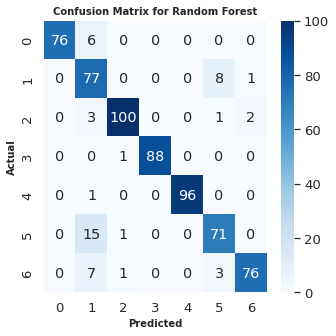


Accuracy: 0.9211
Precision: 0.9303
Recall: 0.9211
F1 score: 0.9236


In [80]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (5,5))
sns.set(font_scale=1.2)

img = sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt='g')

img.set_title(f"Confusion Matrix for Random Forest", fontsize=10, fontweight='bold')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('Actual', fontsize=10, fontweight='bold')
plt.show()

print()
print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred_rf), 4)))
print("Precision: " + str(round(metrics.precision_score(y_test, y_pred_rf, average='weighted'), 4)))
print("Recall: " + str(round(metrics.recall_score(y_test, y_pred_rf, average='weighted'), 4)))
print("F1 score: " + str(round(metrics.f1_score(y_test, y_pred_rf, average='weighted'), 4)))

In [81]:
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        82
           1       0.71      0.90      0.79        86
           2       0.97      0.94      0.96       106
           3       1.00      0.99      0.99        89
           4       1.00      0.99      0.99        97
           5       0.86      0.82      0.84        87
           6       0.96      0.87      0.92        87

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



## Support Vector Machine (SVM)

In [82]:
from sklearn.svm import SVC

In [83]:
svm = SVC(kernel='poly', random_state=42)

In [84]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(kernel='poly', random_state=42)

In [85]:
y_pred_svm = svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


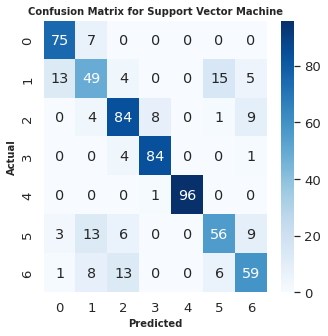


Accuracy: 0.7934
Precision: 0.7899
Recall: 0.7934
F1 score: 0.7907


In [86]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize = (5,5))
sns.set(font_scale=1.2)

img = sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt='g')

img.set_title(f"Confusion Matrix for Support Vector Machine", fontsize=10, fontweight='bold')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('Actual', fontsize=10, fontweight='bold')
plt.show()

print()
print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred_svm), 4)))
print("Precision: " + str(round(metrics.precision_score(y_test, y_pred_svm, average='weighted'), 4)))
print("Recall: " + str(round(metrics.recall_score(y_test, y_pred_svm, average='weighted'), 4)))
print("F1 score: " + str(round(metrics.f1_score(y_test, y_pred_svm, average='weighted'), 4)))

In [87]:
cr_svm = classification_report(y_test, y_pred_svm)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.60      0.57      0.59        86
           2       0.76      0.79      0.77       106
           3       0.90      0.94      0.92        89
           4       1.00      0.99      0.99        97
           5       0.72      0.64      0.68        87
           6       0.71      0.68      0.69        87

    accuracy                           0.79       634
   macro avg       0.79      0.79      0.79       634
weighted avg       0.79      0.79      0.79       634



# Cross Validation (CV)

In [88]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [89]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

## Decision Tree (DT)

In [96]:
cv_dt = cross_val_score(dt, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')

In [97]:
print(f"Decision Tree (DT) CV Accuracy: {round(cv_dt.mean(), 4)} ({round(cv_dt.std(), 4)})")

Decision Tree (DT) CV Accuracy: 0.9266 (0.0218)


## Random Forest (RF)

In [98]:
cv_rf = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')

In [99]:
print(f"Random Forest (RF) CV Accuracy: {round(cv_rf.mean(), 4)} ({round(cv_rf.std(), 4)})")

Random Forest (RF) CV Accuracy: 0.9431 (0.02)


## Support Vector Machine (SVM)

In [100]:
cv_svm = cross_val_score(svm, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')

In [101]:
print(f"Support Vector Machine (SVM) CV Accuracy: {round(cv_svm.mean(), 4)} ({round(cv_svm.std(), 4)})")

Support Vector Machine (SVM) CV Accuracy: 0.8313 (0.0267)
